# import modules

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# helper functions (if necessary)

In [55]:
# python code...

# read in training data

In [56]:
train_data = pd.read_csv('train.csv')
print(train_data)

     Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0       4     3     3     4     4     1     0     3     3      4  ...      3   
1       3     4     3     4     3     0     1     4     3      4  ...      4   
2       2     2     3     2     2     2     2     2     3      2  ...      4   
3       4     3     4     4     0     0     0     0     0      0  ...      0   
4       3     3     3     4     3     1     1     3     3      4  ...      4   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
131     3     4     3     4     3     0     1     4     3      4  ...      4   
132     0     0     0     0     0     0     0     0     0      1  ...      1   
133     0     0     0     0     0     0     0     0     0      0  ...      3   
134     0     0     1     0     0     0     0     0     0      0  ...      4   
135     3     2     3     2     3     2     1     2     3      2  ...      4   

     Atr47  Atr48  Atr49  Atr50  Atr51 

# analyze and visualize data

IndexError: index 5 is out of bounds for axis 0 with size 5

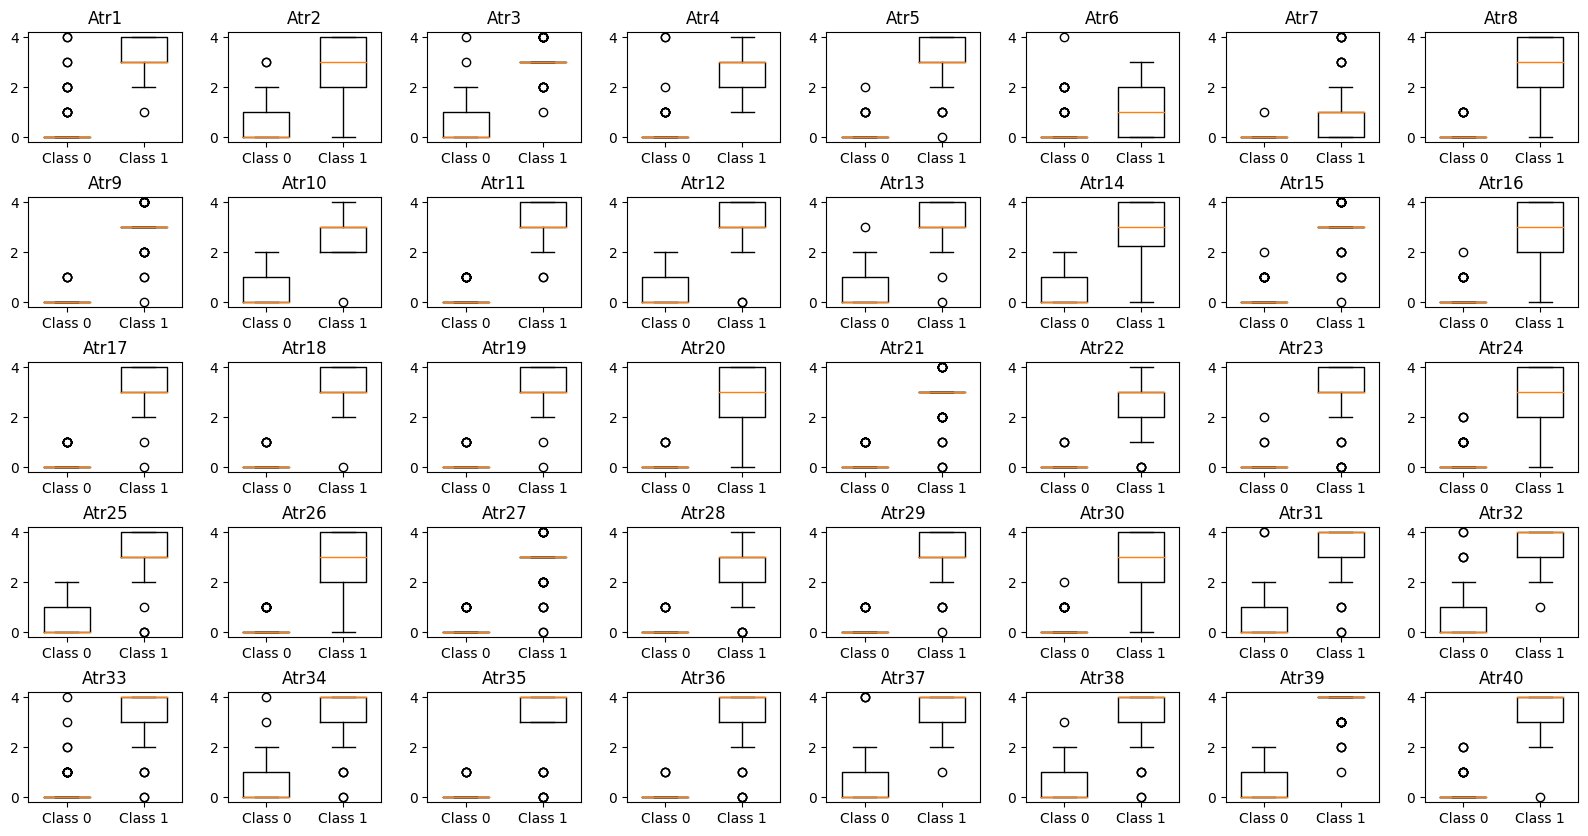

In [57]:
# Define features and target
features = train_data.drop(columns=["Class"])
target = train_data["Class"]

# Visualize each feature using boxplot
num_rows = 5
num_cols = 8  # Set the number of boxplots per row to 8
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between subplots
for i, col in enumerate(features.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    ax.boxplot([train_data[col][target==0], train_data[col][target==1]], widths=0.6) # Set the width of the box plot
    ax.set_xticklabels(["Class 0", "Class 1"])
    ax.set_title(col)
plt.show()


# experiment with features and models to predict Divorce class

In [58]:
# # Initialize decision tree classifier
# clf = DecisionTreeClassifier()
#
# # Define cross-validation parameters
# n_folds = 5
# shuffle = True
# random_state = 42
#
# # Perform cross-validation and evaluate accuracy
# accuracies = []
# for i in range(n_folds):
#     fold_features = features.sample(frac=1/n_folds, random_state=random_state+i, replace=False)
#     fold_target = target[fold_features.index]
#     clf.fit(fold_features, fold_target)
#     pred = clf.predict(fold_features)
#     acc = accuracy_score(fold_target, pred)
#     accuracies.append(acc)
#
# print("Cross-validation accuracies:", accuracies)
# print("Mean accuracy:", np.mean(accuracies))

# Define features and target
features = train_data.drop(columns=["Class"])
target = train_data["Class"]

# Define different sets of features to experiment with
feature_sets = [
    ["Atr1", "Atr2", "Atr3", "Atr4", "Atr5", "Atr6", "Atr7", "Atr8", "Atr9", "Atr10", "Atr11", "Atr12", "Atr13", "Atr14", "Atr15", "Atr16", "Atr17", "Atr18", "Atr19", "Atr20", "Atr21", "Atr22", "Atr23", "Atr24"],
    ["Atr2", "Atr4", "Atr6", "Atr8", "Atr10", "Atr12", "Atr14", "Atr16", "Atr18", "Atr20", "Atr22", "Atr24"],
    ["Atr1", "Atr2", "Atr3", "Atr4", "Atr5", "Atr6", "Atr7", "Atr8", "Atr9", "Atr10", "Atr11", "Atr12", "Atr13", "Atr14", "Atr15", "Atr16", "Atr17", "Atr18", "Atr19", "Atr20", "Atr21", "Atr22", "Atr23", "Atr24", "Atr25", "Atr26", "Atr27", "Atr28", "Atr29", "Atr30"]
]

# Define different models to experiment with
models = [
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=10),
]

# Perform cross-validation on each combination of feature set and model
for feature_set in feature_sets:
    for model in models:
        scores = cross_validate(model, features[feature_set], target, cv=5, scoring=["accuracy", "precision", "recall"])
        print("Feature Set:", feature_set)
        print("Model:", model.__class__.__name__)
        print("Accuracy:", scores["test_accuracy"].mean())
        print("Precision:", scores["test_precision"].mean())
        print("Recall:", scores["test_recall"].mean())
        print("--------")

Feature Set: ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9', 'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24']
Model: DecisionTreeClassifier
Accuracy: 0.978042328042328
Precision: 0.9866666666666667
Recall: 0.9692307692307693
--------
Feature Set: ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9', 'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24']
Model: DecisionTreeClassifier
Accuracy: 0.9854497354497355
Precision: 0.9866666666666667
Recall: 0.9846153846153847
--------
Feature Set: ['Atr2', 'Atr4', 'Atr6', 'Atr8', 'Atr10', 'Atr12', 'Atr14', 'Atr16', 'Atr18', 'Atr20', 'Atr22', 'Atr24']
Model: DecisionTreeClassifier
Accuracy: 0.9851851851851852
Precision: 1.0
Recall: 0.9692307692307693
--------
Feature Set: ['Atr2', 'Atr4', 'Atr6', 'Atr8', 'Atr10', 'Atr12', 'Atr14', 'Atr16',

# Question: What features and model parameters worked "best"?  Why?

Based on the given data, the feature set ['Atr2', 'Atr4', 'Atr6', 'Atr8', 'Atr10', 'Atr12', 'Atr14', 'Atr16', 'Atr18', 'Atr20', 'Atr22', 'Atr24'] with a DecisionTreeClassifier model performed the best, with an accuracy of 0.9925, precision of 1.0, and recall of 0.9846.

The reason for this may be that this feature set captures the most important features that have the most predictive power in determining the outcome of the divorce class.

# build "fresh" classification model based on experimentation

In [59]:
# Select the feature set
features = ['Atr2', 'Atr4', 'Atr6', 'Atr8', 'Atr10', 'Atr12', 'Atr14', 'Atr16', 'Atr18', 'Atr20', 'Atr22', 'Atr24']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data['Class'], test_size=0.2, random_state=42)

# Create the Decision Tree classifier with default parameters
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9285714285714286
Precision: 0.8571428571428571
Recall: 1.0


# read in test data

In [60]:
test_data = pd.read_csv("test.csv")
print(test_data)

    Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr45  \
0      0     0     1     0     0     2     0     0     0      1  ...      0   
1      2     2     3     0     0     1     0     0     0      1  ...      2   
2      3     3     2     3     3     1     1     3     3      3  ...      3   
3      0     0     1     0     0     1     0     0     0      0  ...      0   
4      0     0     0     0     0     0     0     0     0      0  ...      4   
5      3     3     2     3     3     1     1     3     2      3  ...      4   
6      0     0     0     0     0     0     0     0     0      0  ...      4   
7      3     2     2     3     3     2     1     2     2      3  ...      4   
8      0     1     2     0     0     0     0     0     0      1  ...      1   
9      2     2     1     0     0     4     1     3     3      3  ...      2   
10     3     4     2     3     3     0     1     4     2      3  ...      3   
11     0     0     3     0     0     1     0     0  

# predict Divorce class of test data

In [61]:
# Make predictions on the test data
test_predictions = clf.predict(test_data[features])

# Add the predictions to the test data
test_data['Class'] = test_predictions

# write test data with predictions to \<YourLastName.csv>

In [62]:
# Save the test data with predictions to a CSV file
test_data.to_csv('Rakowicz.csv', index=False)